<a href="https://colab.research.google.com/github/JIGSAW100/Aric/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=eda6b934c36584add9df9abdb5071712cc13d1b7e6d6ea3c034f267a08df2c40
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=5599365c9a65a334853cf6ee677d71fe124a4e10092ded1b1b10c4afae325d8c
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = '/content/drive/MyDrive/chest_xray'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range = 0.2,
                                   zoom_range = 0.2,)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    class_mode = 'binary')     
# --------------------
# Flow validation images in batches of 32 using test_datagen generator
# --------------------
test_generator =  datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                                         batch_size=32,
                                                         target_size = (224, 224),
                                                         class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID-19': 0, 'NORMAL': 1}

# **CNN model**

In [ ]:
cnn_model = tf.keras.models.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2), 
                           tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2), 
                           tf.keras.layers.Conv2D(254,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(510,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(510,activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(2, activation='softmax')

])
      

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 254)       2

In [ ]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h = cnn_model.fit(train_generator,
                    validation_data= test_generator,
                    epochs=10)

Epoch 1/10
163/163 [==============================] - 111s 676ms/step - loss: 0.0821 - accuracy: 0.9746 - val_loss: 0.4761 - val_accuracy: 0.8526
Epoch 2/10
163/163 [==============================] - 111s 678ms/step - loss: 0.0873 - accuracy: 0.9653 - val_loss: 0.3767 - val_accuracy: 0.8766
Epoch 3/10
163/163 [==============================] - 110s 674ms/step - loss: 0.0785 - accuracy: 0.9711 - val_loss: 0.2982 - val_accuracy: 0.9119
Epoch 4/10
163/163 [==============================] - 110s 674ms/step - loss: 0.0684 - accuracy: 0.9737 - val_loss: 0.5517 - val_accuracy: 0.8670
Epoch 5/10
163/163 [==============================] - 110s 677ms/step - loss: 0.0701 - accuracy: 0.9741 - val_loss: 0.3707 - val_accuracy: 0.9071
Epoch 6/10
163/163 [==============================] - 110s 673ms/step - loss: 0.0742 - accuracy: 0.9709 - val_loss: 0.5001 - val_accuracy: 0.8670
Epoch 7/10
163/163 [==============================] - 110s 674ms/step - loss: 0.0740 - accuracy: 0.9774 - val_loss: 0.4852 -

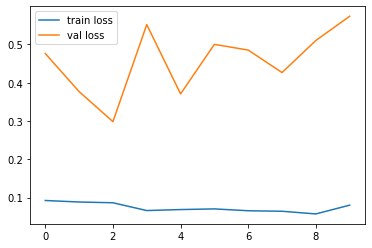

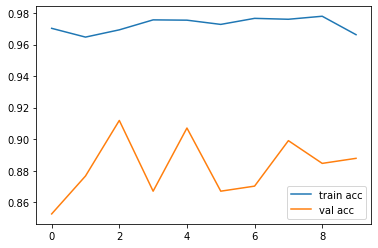

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(cnn_model.predict(test_generator), axis=-1)
print(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[305  85]
 [175  59]]


     |████████████████████████████████| 1.4MB 8.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae0e106990>)

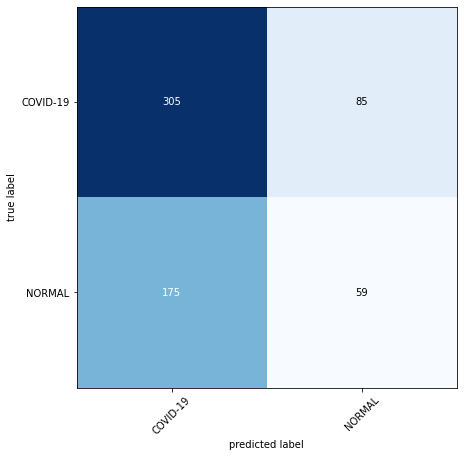

In [ ]:
!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# **RANDOM** **SEARCH**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np  

In [ ]:
X_train1 = np.append(train_generator)
y_train1 = np.append(train_generator)

print(X_train1.shape)
print(y_train1.shape)

TypeError: ignored

In [ ]:
def build_model(hp):  
  opt_model = Sequential([
       Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(2, activation='softmax')
  ])
  
  opt_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return opt_model               
                        

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch 

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='covid')

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(train_generator,y_train1,epochs=3)

# VGG MODEL

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
vgg_model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = vgg_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 132s 789ms/step - loss: 0.4128 - accuracy: 0.8545 - val_loss: 0.4463 - val_accuracy: 0.8365
Epoch 2/10
163/163 [==============================] - 128s 788ms/step - loss: 0.0936 - accuracy: 0.9634 - val_loss: 0.3791 - val_accuracy: 0.8766
Epoch 3/10
163/163 [==============================] - 126s 775ms/step - loss: 0.0763 - accuracy: 0.9697 - val_loss: 0.3896 - val_accuracy: 0.8942
Epoch 4/10
163/163 [==============================] - 126s 774ms/step - loss: 0.0650 - accuracy: 0.9744 - val_loss: 0.3125 - val_accuracy: 0.9022
Epoch 5/10
163/163 [==============================] - 125s 770ms/step - loss: 0.0708 - accuracy: 0.9728 - val_loss: 0.8844 - val_accuracy: 0.7740
Epoch 6/10
163/163 [==============================] - 126s 772ms/step - loss: 0.0682 - accuracy: 0.9766 - val_loss: 1.0594 - val_accuracy: 0.7692
Epoch 7/10
163/163 [==============================] - 125s 767ms/step - loss: 0.0668 - accuracy: 0.9781 - val_loss: 0.5849 -

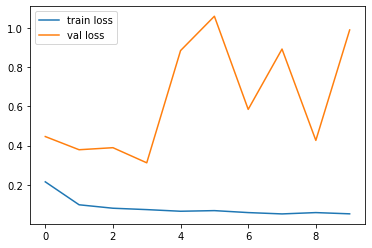

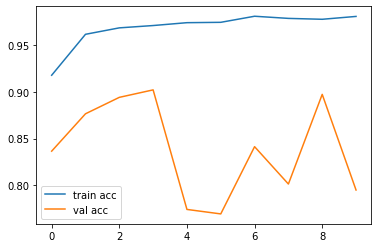

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(vgg_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

F1 Score:  0.5100250626566415
Precision:  0.5007888212756366
Accuracy:  0.5641025641025641


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       522
           1       0.14      0.31      0.19       102

    accuracy                           0.56       624
   macro avg       0.48      0.46      0.45       624
weighted avg       0.71      0.56      0.62       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(vgg_model.predict(test_generator), axis=-1)
print(y_pred)

[0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[312  78]
 [208  26]]


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e4004abd0>)

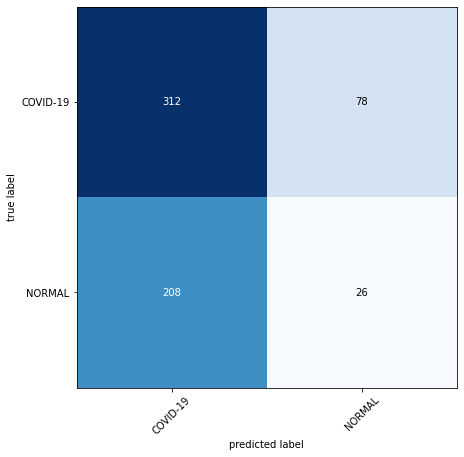

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# INCEPTION


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
incept = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in incept.layers:
    layer.trainable = False

x = Flatten()(incept.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
incept_model = Model(inputs=incept.input, outputs=prediction)

In [ ]:
incept_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [ ]:
incept_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = incept_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 2796s 17s/step - loss: 1.9752 - accuracy: 0.8484 - val_loss: 2.0739 - val_accuracy: 0.8125
Epoch 2/5
163/163 [==============================] - 135s 829ms/step - loss: 0.6372 - accuracy: 0.9259 - val_loss: 2.6263 - val_accuracy: 0.8189
Epoch 3/5
163/163 [==============================] - 131s 804ms/step - loss: 0.5138 - accuracy: 0.9450 - val_loss: 1.9146 - val_accuracy: 0.8381
Epoch 4/5
163/163 [==============================] - 135s 828ms/step - loss: 0.3936 - accuracy: 0.9569 - val_loss: 2.8189 - val_accuracy: 0.8045
Epoch 5/5
163/163 [==============================] - 136s 835ms/step - loss: 0.4874 - accuracy: 0.9437 - val_loss: 1.5310 - val_accuracy: 0.8734


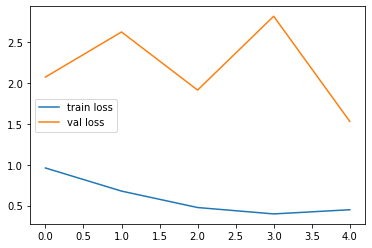

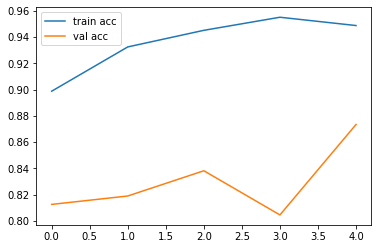

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(incept_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

F1 Score:  0.531522940657926
Precision:  0.5275481105768679
Accuracy:  0.5368589743589743


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       413
           1       0.33      0.37      0.35       211

    accuracy                           0.54       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.55      0.54      0.54       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(incept_model.predict(test_generator), axis=-1)
print(y_pred)


[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[261 129]
 [158  76]]


     |████████████████████████████████| 1.4MB 10.6MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05a9c7de90>)

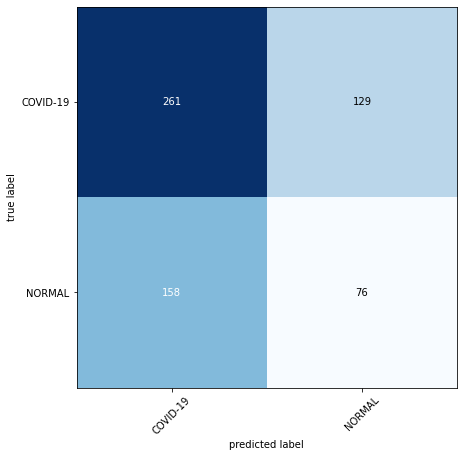

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# **RESNET**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
resnet_model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
resnet_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = resnet_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 118s 707ms/step - loss: 1.2871 - accuracy: 0.7179 - val_loss: 0.6896 - val_accuracy: 0.6843
Epoch 2/10
163/163 [==============================] - 114s 699ms/step - loss: 0.3392 - accuracy: 0.8541 - val_loss: 0.4904 - val_accuracy: 0.8013
Epoch 3/10
163/163 [==============================] - 113s 696ms/step - loss: 0.3082 - accuracy: 0.8751 - val_loss: 0.5021 - val_accuracy: 0.7981
Epoch 4/10
163/163 [==============================] - 112s 688ms/step - loss: 0.3158 - accuracy: 0.8807 - val_loss: 0.3610 - val_accuracy: 0.8494
Epoch 5/10
163/163 [==============================] - 113s 691ms/step - loss: 0.2741 - accuracy: 0.8936 - val_loss: 0.3099 - val_accuracy: 0.8686
Epoch 6/10
163/163 [==============================] - 112s 687ms/step - loss: 0.2366 - accuracy: 0.9057 - val_loss: 0.8942 - val_accuracy: 0.7179
Epoch 7/10
163/163 [==============================] - 112s 686ms/step - loss: 0.2825 - accuracy: 0.8907 - val_loss: 0.3760 -

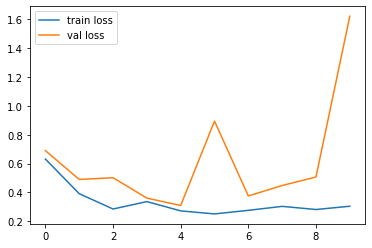

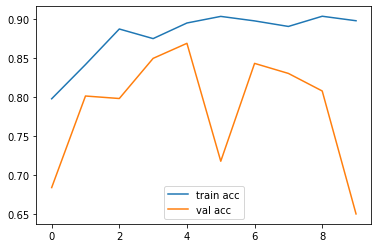

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(resnet_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

F1 Score:  0.4829692271552736
Precision:  0.4645833333333333
Accuracy:  0.6025641025641025


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       600
           1       0.02      0.21      0.04        24

    accuracy                           0.60       624
   macro avg       0.49      0.41      0.39       624
weighted avg       0.92      0.60      0.72       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(resnet_model.predict(test_generator), axis=-1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[373  17]
 [227   7]]


     |████████████████████████████████| 1.4MB 18.6MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd1f7185d50>)

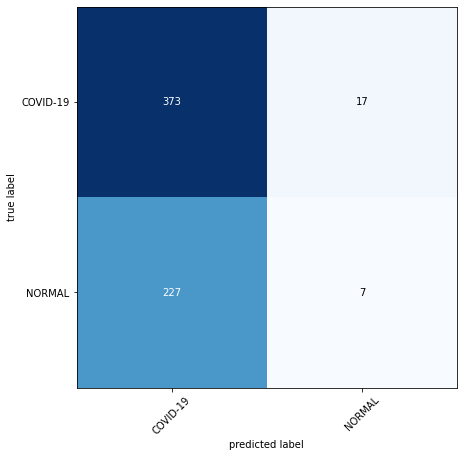

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)